# Принятие решений в бизнесе на основе данных и проверка гипотез

**ОПИСАНИЕ ПРОЕКТА**

Аналитики и маркетологи интернет-магазина подготовили список гипотез для увеличения выручки.

**Необходимо:**
<li> Приоритизировать гипотезы
<li> запустить A/B-тест
<li> проанализировать результаты.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = -1
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import plotly.express as px
import seaborn as sns

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

В датасете hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Применение фреймворка ICE для приоритизации гипотез с сортировкой по убыванию приоритета.

In [3]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#расчет ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективными гипотезами при использовании фреймворка ICE оказались 8, 0, 7

### Примените фреймворк RICE для приоритизации гипотез. 

In [6]:
#расчет RICE
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективными гипотезами при использовании фреймворка RICE оказались 7, 2, 0, 6

**Приоритизация гипотез при помощи разных фраймворков дает отличные друг от друга результаты: Гипотезы номер 0 и 7 являются перспективными и при применении RISE и при применении ICE. Самая перспективная гипотеза при применении фраймворта ICE  - гипотеза 8 не попала в перспективные при применении фраймворка RISE. Это произошло из-за того, что в фраймворке RICE учитывается показатель Reach: у гипотезы 8 он равен 1, а у гипотезы 7 - 10. Именно поэтому в фраймфорке RICE лидирует гипотеза номер 7.**

## Анализ A/B-теста

Результаты A/B-теста описаны в файлах orders и visitors

In [7]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датафрейм заполнен полностью, нобходимо его проверить на дубликаты, а так же изменить тип у столбца: date на datetime

In [9]:
orders['date'] = orders['date'].map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
print('Дубликатов в датесете orders: ', orders.duplicated().sum()) 

Дубликатов в датесете orders:  0


In [11]:
#проверю датесет на баг: мог ли один и тот же пользователь попасть и в группу А и в группу B теста одновременно
#для этого необходимо найти уникальных пользователей группы А и уникальных пользователей группы В и сравнить эти данные

visitorId_A = orders.query('group == "A"')['visitorId']
visitorId_B = orders.query('group == "B"')['visitorId']

In [12]:
#сравниваю списки, в переменной a сохранены visitorId, которые попали и в группу A и в группу B

a = (set(visitorId_A) & set(visitorId_B))
#print(a)
print('Кол-во пользователей, которые присутствуют в обеих группах теста:', len(a))


Кол-во пользователей, которые присутствуют в обеих группах теста: 58


58 пользователей, которые находятся в обеих группах теста. Сложно предположить откуда взялся такой баг, поэтому думаю, что этих пользователей необходимо удалить и из группы А,  и из группы В

In [13]:
#очищу датесет при помощи query
orders = orders.query('visitorId not in @a')

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [15]:
print('Кол-во уникальных пользователей в группе А:', orders.query('group == "A"')['visitorId'].nunique())
print('Кол-во уникальных пользователей в группе B:', orders.query('group == "B"')['visitorId'].nunique())

Кол-во уникальных пользователей в группе А: 445
Кол-во уникальных пользователей в группе B: 528


Кол-во пользователей в группах теста распределено не равномерно. Это может исказить результаты.

In [16]:
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датафрейм заполнен полностью, нобходимо его проверить на дубликаты, а так же изменить тип у столбца: date

In [18]:
visitors['date'] = visitors['date'].map(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
print('Дубликатов в датесете visitors: ', visitors.duplicated().sum()) 

Дубликатов в датесете visitors:  0


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### График кумулятивной выручки по группам. 

In [21]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [22]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [24]:
# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])

In [25]:
display(ordersAggregated.head())

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [26]:
# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
display(visitorsAggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [28]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [29]:
print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



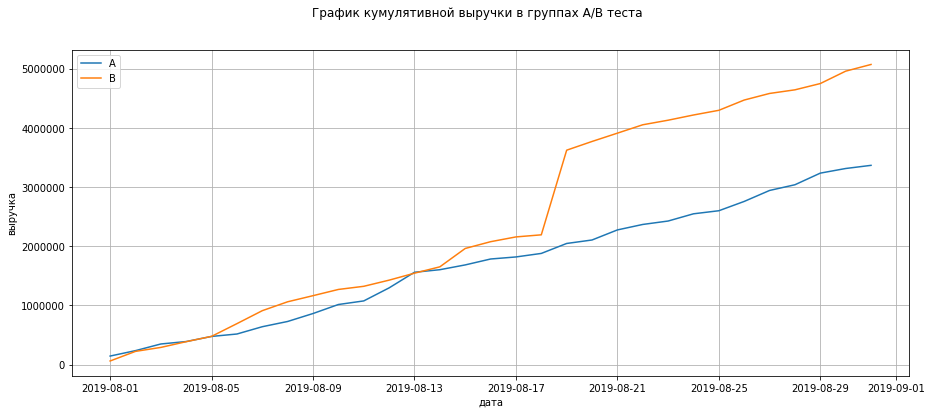

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.suptitle('График кумулятивной выручки в группах А/В теста')
plt.ylabel('выручка')
plt.xlabel('дата')
plt.grid(True)
plt.legend(); 

Несмотря на то, что кумулятивная выручка в обеих группах растет,группа А заметно отстает от группы В. В группе В 2019-08-19 произошел резкий скачок выручки. Это могло произойти либо из-за покупки какого-то дорогостоящего товара, либо из-за резкого роста числа заказов. В группе А таких всплесков не наблюдается.

### График кумулятивного среднего чека по группам. 

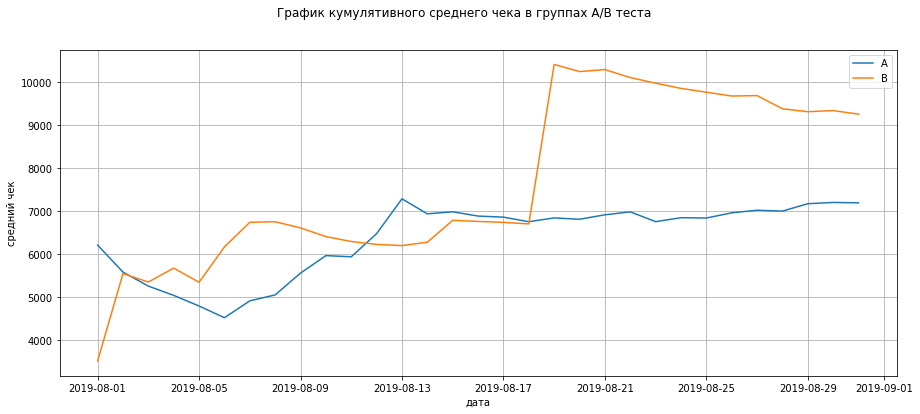

In [31]:
plt.figure(figsize=(15, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.suptitle('График кумулятивного среднего чека в группах А/В теста')
plt.ylabel('средний чек')
plt.xlabel('дата')
plt.grid(True)
plt.legend(); 

На графике видно, что средний чек группы А стал стабилизироваться вокруг отметки 7000 р. А вот средний чек группы В показал резкий рост в ту же дату, что и рост кумулятивной выручки этой группы. Поэтому можно сделать вывод, что рост кумулятивной выручки произошел из-за продажи какого-то дорогостоящего товара, а не роста числа заказов. Средний чек группы В еще не стабилизировался, поэтому по даному показателю тест необходимо продолжить.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

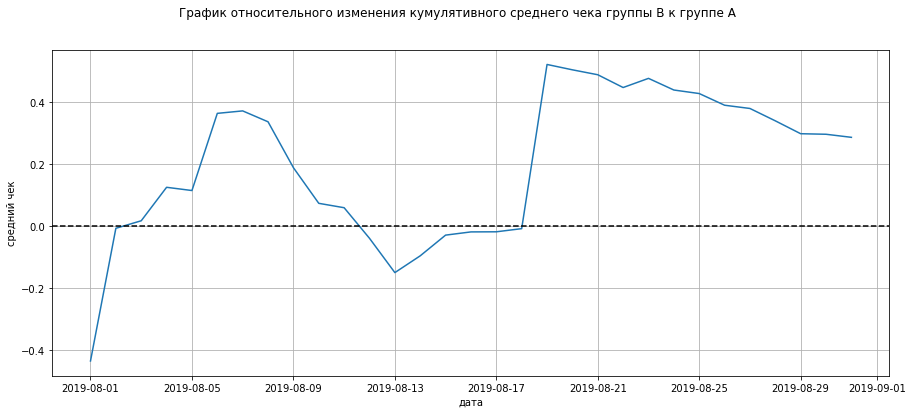

In [32]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.suptitle('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('средний чек')
plt.xlabel('дата')
plt.grid(True);



В нескольких точках график резко скачет, на это могли повлиять крупные заказы и выбросы в данных.

### График кумулятивной конверсии по группам.

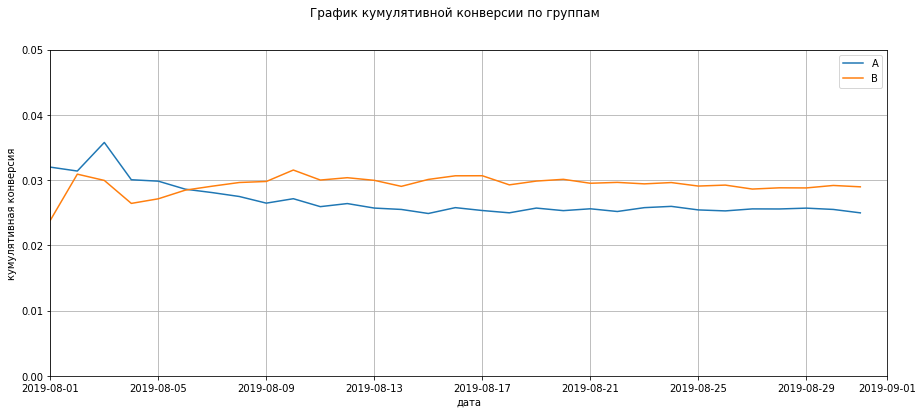

In [33]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.suptitle('График кумулятивной конверсии по группам')
plt.ylabel('кумулятивная конверсия')
plt.xlabel('дата')
plt.grid(True)
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05])
plt.legend();

Кумулятивная конверсия в обеих игруппах зафиксировалась. В группе В кумулятивная конверсия выше.

### График относительного изменения кумулятивной конверсии группы B к группе A.

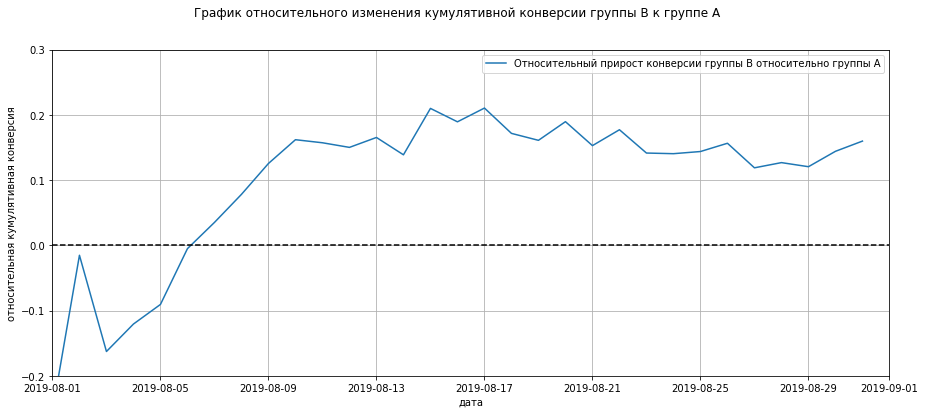

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 6))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')


plt.suptitle('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('относительная кумулятивная конверсия')
plt.xlabel('дата')
plt.grid(True)

plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3]) 
plt.legend();

В начале теста, конверсия группы В была меньше конверсии группы А. Но затем конвесия группы В стала расти. И в середине теста конверсия группы В стала стабильно выше конверсии группы А.

### Точечный график количества заказов по пользователям.

In [35]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [36]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby(
    'visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


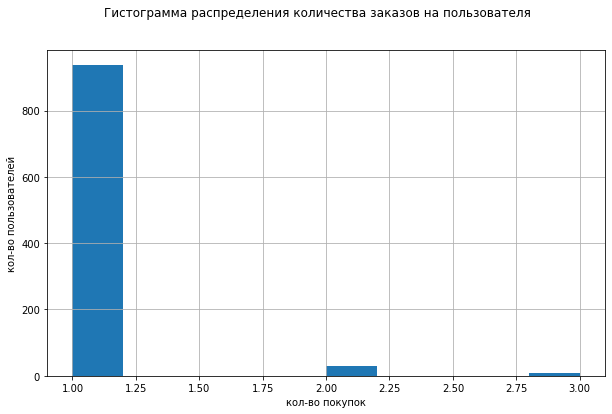

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(ordersByUsers['orders']) 
plt.grid(True)

plt.suptitle('Гистограмма распределения количества заказов на пользователя')
plt.ylabel('кол-во пользователей')
plt.xlabel('кол-во покупок');


По гистограмме видно, что чаще всего пользователи совершаюь 1 покупку, а так же есть доля пользователей с 2покупками. 

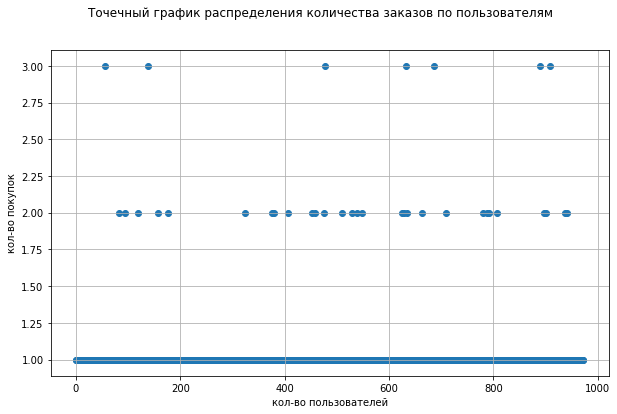

In [38]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid(True)
plt.suptitle('Точечный график распределения количества заказов по пользователям')
plt.ylabel('кол-во покупок')
plt.xlabel('кол-во пользователей');

Предположу, что пользователей с кол-вом покупок 3 и более можно считать аномалиями. Это необходимо проверить, воспользуюсь перцентилями.

###  95-й и 99-й перцентили количества заказов на пользователя. 

In [39]:
print('95 перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [95])) 
print('99 перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [99])) 

95 перцентили количества заказов на пользователя: [1.]
99 перцентили количества заказов на пользователя: [2.]


Всего 5% пользователей заказывают более 1 товара. Эта величина и будет границей аномальных пользователей.


### Точечный график стоимостей заказов.

In [40]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


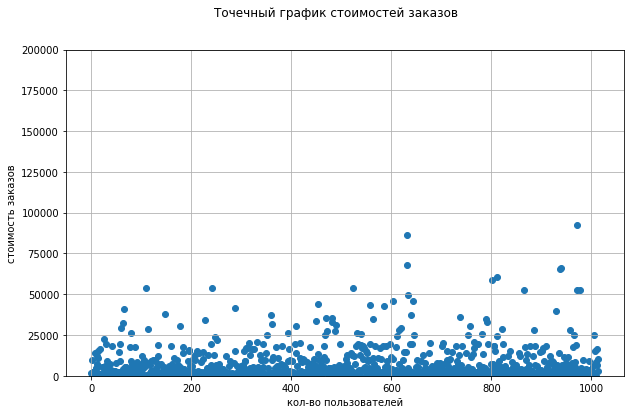

In [41]:
x_values_1 = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.scatter(x_values_1, orders['revenue']) 
plt.grid(True)
plt.suptitle('Точечный график стоимостей заказов')
plt.ylabel('стоимость заказов')
plt.ylim(0, 200000)
plt.xlabel('кол-во пользователей');

Большая часть заказов лежит в пределах 50 тысяч рублей. 

### 95-й и 99-й перцентили стоимости заказов.

In [42]:
print('95 перцентили количества заказов на пользователя:', np.percentile(orders['revenue'], [95])) 
print('99 перцентили количества заказов на пользователя:', np.percentile(orders['revenue'], [99])) 

95 перцентили количества заказов на пользователя: [26785.]
99 перцентили количества заказов на пользователя: [53904.]


Стоимость 95% заказов меньше 26 785 руб, и стоимость только 1% заказов превышает 53904 руб. Границу аномальной стоимости заказов буду считать - 26 785 руб

### Рассчет статистической значимости различий в конверсиях между группами по «сырым» данным. 

Нулевая гипотеза: Конверсия группы А и группы В по сырым данным одинаковая.

Альтернативная гипотеза: Конверсия группы А и группы В отличается.

In [43]:
#выделим группу А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
display(visitorsADaily.head())

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [44]:
# датафрейм с кумулятивным количеством посетителей по дням в группе А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
display(visitorsACummulative.head())

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [45]:
#выделим группу B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
display(visitorsBDaily.head())

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [46]:
# датафрейм с кумулятивным количеством посетителей по дням в группе В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
display(visitorsBCummulative.head())

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [47]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [48]:
#найдем общее кол-во заказов и общую выручку по каждому дню в группе А
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

display(ordersADaily.head())

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [49]:
#найдем кумулятивное кол-во заказов и кумулятивную выручку в группе А
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

display(ordersACummulative.head())

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [50]:
#найдем общее кол-во заказов и общую выручку по каждому дню в группе В
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

display(ordersBDaily.head())

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [51]:
#найдем кумулятивное кол-во заказов и кумулятивную выручку в группе В
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])

ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

display(ordersBCummulative.head())

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [52]:
#объединим таблицы по столбцу дота
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [53]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [54]:
#В переменную ordersByUsersA со столбцами ['userId', 'orders'] укажем число совершённых заказов.
#для пользователей, которые заказывали хотя бы 1 раз

ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']
display(ordersByUsersA.head())

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [55]:
#В переменную ordersByUsersB со столбцами ['userId', 'orders']  укажем число совершённых заказов
#для пользователей, которые заказывали хотя бы 1 раз

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders'] 
display(ordersByUsersB.head())

,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [56]:
#sampleA, sampleВ  - выборка, где каждый элемент — число заказов определённого пользователя 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(
    data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(
    data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [57]:
print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие в конверсии между группами А и В:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.006
Относительное различие в конверсии между группами А и В: 0.160


P-value = 0.006, это меньше 0.05. Значит, нулевую гипотезу о том, что конверсии в группах по сырым данным одинаковые, **отвергаем**. Относительный выигрыш группы B равен 16%

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: Средний чек группы А и группы В по сырым данным одинаковый.
Альтернативная гипотеза: Средний чек группы А и группы В по сырым данным разный.

In [58]:
print('p-value:{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке:{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:0.415
Относительное различие в среднем чеке:0.287


P-value значительно больше 0.05. Нет причин отвергать нулевую гипотезу.
Тем немнее, средний чек группы B значительно выше среднего чека группы A.

### Рассчет статистической значимости различий в конверсиях между группами по «очищенным» данным. 

Примем за аномальных пользователей тех, кто совершил более 1 покупки и совершил заказ дороже 26 785 руб.

Нулевая гипотеза: Конверсия группы А и группы В по очищенным данным одинаковая.

Альтернативная гипотеза: Конверсия группы А и группы В отличается.

In [59]:
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],],axis=0)

In [60]:
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Кол-во аномальных пользователей:', abnormalUsers.shape) 

Кол-во аномальных пользователей: (86,)


In [61]:
#отфильтруем данные

sampleAFiltered = pd.concat([ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],pd.Series(0,index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[
    np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],pd.Series(0, index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ), name='orders',),],axis=0,)


In [62]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница в конверсиях по очищенным данным: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.008
Относительная разница в конверсиях по очищенным данным: 0.174


p-value меньше 0.05, мы так же отвергаем нулевую гипотезу. Результаты очищенных данных по конверсии практически не изменились.

### Рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [63]:
print('P-value =', "{0:.3f}".format(stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],)[1]))

print("{0:.3f}".format(orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() - 1))

P-value = 0.364
-0.034


P-value практически не изменился, мы принимаем нулевую гипотезу.  Средний чек группы В по очищенным данным стал меньше среднего чека группы А. Разница между сегментами сократилась с 28,7 % до 3,4 %

### График кумулятивного среднего чека по группам по очищенным даным. 

In [64]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [65]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


Отфильтрую датесет: стоимость заказа не должна превышать 26784 руб

In [66]:
orders_1 = orders.query('revenue < 26785')

In [67]:
orders_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 1194
Data columns (total 5 columns):
transactionId    965 non-null int64
visitorId        965 non-null int64
date             965 non-null datetime64[ns]
revenue          965 non-null int64
group            965 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 45.2+ KB


In [68]:
datesGroups = orders_1[['date','group']].drop_duplicates() 

In [69]:
# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders_1[np.logical_and(
    orders_1['date'] <= x['date'], orders_1['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])

In [70]:
# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [71]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [72]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

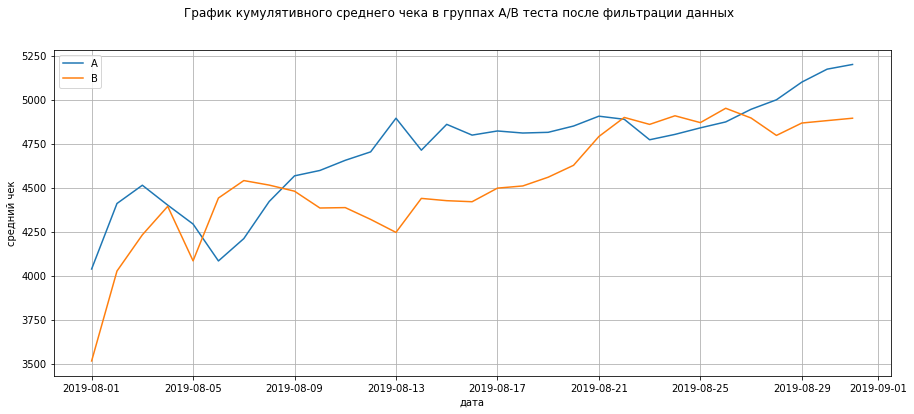

In [73]:
plt.figure(figsize=(15, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.suptitle('График кумулятивного среднего чека в группах А/В теста после фильтрации данных')
plt.ylabel('средний чек')
plt.xlabel('дата')
plt.grid(True)
plt.legend(); 

График кумулятивного чека после фильтрации данных имеет резкие скачки и спады и в группе А, и в группе В. И по этому графику я бы сказала, что средний чек группы В начинает стабилизироваться вокруг суммы 4850 руб.

## Вывод

Несмотря на то, что кумулятивная выручка в обеих группах растет,группа А заметно отстает от группы В.

Конверсия группы А ниже конверсии группы В.

График среднего чека показывает, что средний чек группы А (по сырым данным) стал стабилизироваться вокруг отметки 7000 р. А вот средний чек группы В показал резкий рост в ту же дату, что и рост кумулятивной выручки этой группы. Средний чек группы В еще не стабилизировался.


По всем показателям можно признать тест успешным и остановить его. Но если бизнесу необходимо узнать средний чек групы В, то тест надо продолжить, т.к. кумулятивная величина чека не стабилизировалась
